In [1]:
# generic libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from concurrent.futures import ProcessPoolExecutor

# project specific custom libraries
from config import *
from simulation import simulate_decay_times
from analysis import binned_maximum_likelihood_fit, pull

In [2]:
#set a seed for numpys random number generator
np.random.seed(42)

In [3]:
# Exercise part 3 Simple simulation

# Part 0, generate the plot from the N function
t_bounds = [0, 2e-5]
n = 10000

t_space = np.linspace(t_bounds[0], t_bounds[1], n)
t_computed_values = N(t_space, n)

# Part 1, simulate n decay times and create a histogram plot
simulated_decay_points = simulate_decay_times(n, t_bounds[1])

# create the histogram
counts, bins = np.histogram(simulated_decay_points[:, 0] , bins=25)
plt.hist(bins[:-1], bins, weights=counts, color='lightgray', edgecolor='black')
plt.xlabel('Time [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {n} simulated decay times')
plt.savefig('../Documentation/images/simulated_decay_histogram.png', dpi=750)
plt.close()

muon_estimate, muon_uncertainty, muon_pull, pion_estimate, pion_uncertainty, pion_pull = binned_maximum_likelihood_fit(counts, bins)
print(muon_estimate, muon_uncertainty, muon_pull, pion_estimate, pion_uncertainty, pion_pull)


2.255487805804414e-06 2.218906359613206e-06 0.02500682625204896 1.3177846766698188e-08 2.3759832886143395e-08 -0.5410456081447806


/opt/homebrew/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


In [ ]:
"""
from concurrent.futures import ThreadPoolExecutor

# Make sure this is defined at the top level
def single_simulation(_):
    simulated_decay_points = simulate_decay_times(n, t_bounds[1])
    counts, bins = np.histogram(simulated_decay_points[:, 0], bins=25)
    return binned_maximum_likelihood_fit(counts, bins)

number_of_simulations = 10

# Run simulations using threads
with ThreadPoolExecutor() as executor:
    results = list(executor.map(single_simulation, range(number_of_simulations)))

# Unpack results
muon_estimates, muon_uncertainties, muon_pulls = zip(*[(r[0], r[1], r[2]) for r in results])
pion_estimates, pion_uncertainties, pion_pulls = zip(*[(r[3], r[4], r[5]) for r in results])
"""

/Users/lucien/Documents/Lucien/002-Bildung/2023-00-00-Universität/Semester 4 FS2024/PHY 241 Data Analysis II/Project/Code/config.py:14: RuntimeWarning: overflow encountered in exp
  second_part = exp(- t / muon_mean_lifetime) - exp(- t / pion_mean_lifetime)
/Users/lucien/Documents/Lucien/002-Bildung/2023-00-00-Universität/Semester 4 FS2024/PHY 241 Data Analysis II/Project/Code/config.py:17: RuntimeWarning: overflow encountered in multiply
  return first_part * second_part


In [ ]:
# part c
"""
Repeat the simulation 100 times and produce histrograms with the 100 values of the mean lifetimes
that we obtain. Determine the standard deviations of the two distributions
"""

muon_estimates = []
pion_estimates = []
muon_pulls = []
pion_pulls = []

number_of_simulations = 100
for i in range(number_of_simulations):
    print(f"Simulation {i+1}/{number_of_simulations}")
    simulated_decay_points = simulate_decay_times(n, t_bounds[1])
    counts, bins = np.histogram(simulated_decay_points[:, 0] , bins=25)
    muon_estimate, muon_uncertainty, muon_pull, pion_estimate, pion_uncertainty, pion_pull = binned_maximum_likelihood_fit(counts, bins)
    
    muon_estimates.append(muon_estimate)
    pion_estimates.append(pion_estimate)
    
    muon_pulls.append(muon_pull)
    pion_pulls.append(pion_pull)


'\nmuon_estimates = []\npion_estimates = []\nmuon_pulls = []\npion_pulls = []\n\nnumber_of_simulations = 100\nfor i in range(number_of_simulations):\n    print(f"Simulation {i+1}/{number_of_simulations}")\n    simulated_decay_points = simulate_decay_times(n, t_bounds[1])\n    counts, bins = np.histogram(simulated_decay_points[:, 0] , bins=25)\n    muon_estimate, muon_uncertainty, muon_pull, pion_estimate, pion_uncertainty, pion_pull = binned_maximum_likelihood_fit(counts, bins)\n    \n    muon_estimates.append(muon_estimate)\n    pion_estimates.append(pion_estimate)\n    \n    muon_pulls.append(muon_pull)\n    pion_pulls.append(pion_pull)\n'

(0.01586258410376067, -0.012381849393739229, 0.012914061568300474, 0.003476089960677242, 0.016486613104154654, 0.008715166562575632, 0.0077533374806805395, -0.0017173516254218645, 0.002046701018725605, 0.003939080323384525)


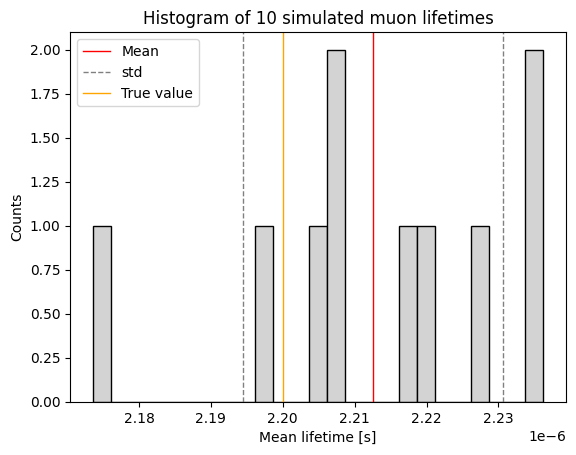

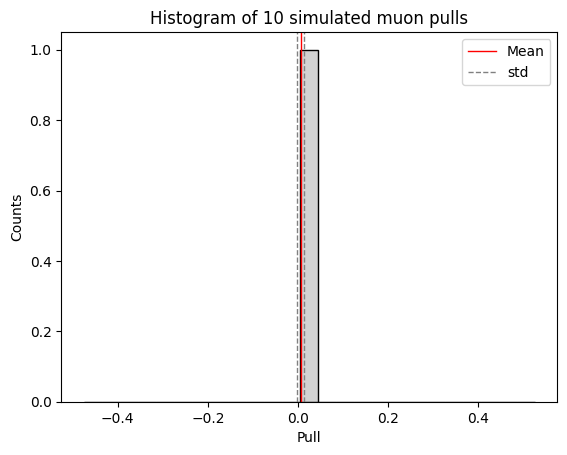

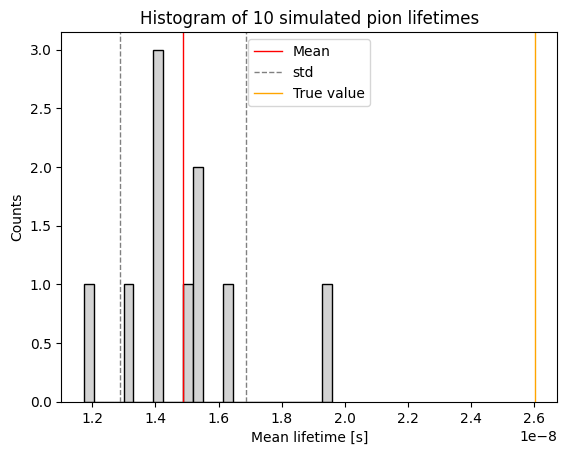

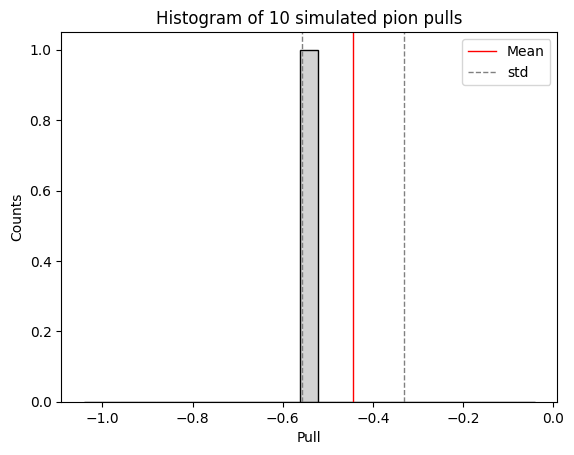

In [ ]:
# do the evaluation for the muon
mean_pion_estimate = np.mean(pion_estimates)
std_pion_estimate = np.std(pion_estimates)

mean_muon_estimate = np.mean(muon_estimates)
std_muon_estimate = np.std(muon_estimates)

mean_muon_pull = np.mean(muon_pulls)
std_muon_pull = np.std(muon_pulls)

mean_pion_pull = np.mean(pion_pulls)
std_pion_pull = np.std(pion_pulls)



plt.hist(muon_estimates, bins=25, color='lightgray', edgecolor='black')
plt.axvline(mean_muon_estimate, color='red', linewidth=1, label='Mean')
plt.axvline(mean_muon_estimate + std_muon_estimate, color='gray', linestyle='dashed', linewidth=1, label='std')
plt.axvline(mean_muon_estimate - std_muon_estimate, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(MUON_MEAN_LIFETIME, color='orange', label='True value', linewidth=1)
plt.legend()
plt.xlabel('Mean lifetime [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {number_of_simulations} simulated muon lifetimes')
plt.savefig('../Documentation/images/pion_simulation.png', dpi=750)
plt.show()

plt.hist(muon_pull, bins=25, color='lightgray', edgecolor='black')
plt.axvline(mean_muon_pull, color='red', linewidth=1, label='Mean')
plt.axvline(mean_muon_pull + std_muon_pull, color='gray', linestyle='dashed', linewidth=1, label='std')
plt.axvline(mean_muon_pull - std_muon_pull, color='gray', linestyle='dashed', linewidth=1)
plt.legend()
plt.xlabel('Pull')
plt.ylabel('Counts')
plt.title(f'Histogram of {number_of_simulations} simulated muon pulls')
plt.savefig('../Documentation/images/muon_simulation_pull.png', dpi=750)
plt.show()

plt.hist(pion_estimates, bins=25, color='lightgray', edgecolor='black')
plt.axvline(mean_pion_estimate, color='red', linewidth=1, label='Mean')
plt.axvline(mean_pion_estimate + std_pion_estimate, color='gray', linestyle='dashed', linewidth=1, label='std')
plt.axvline(mean_pion_estimate - std_pion_estimate, color='gray', linestyle='dashed', linewidth=1)
plt.axvline(PION_MEAN_LIFETIME, color='orange', label='True value', linewidth=1)
plt.legend()
plt.xlabel('Mean lifetime [s]')
plt.ylabel('Counts')
plt.title(f'Histogram of {number_of_simulations} simulated pion lifetimes')
plt.savefig('../Documentation/images/muon_simulation.png', dpi=750)
plt.show()

plt.hist(pion_pull, bins=25, color='lightgray', edgecolor='black')
plt.axvline(mean_pion_pull, color='red', linewidth=1, label='Mean')
plt.axvline(mean_pion_pull + std_pion_pull, color='gray', linestyle='dashed', linewidth=1, label='std')
plt.axvline(mean_pion_pull - std_pion_pull, color='gray', linestyle='dashed', linewidth=1)
plt.legend()
plt.xlabel('Pull')
plt.ylabel('Counts')
plt.title(f'Histogram of {number_of_simulations} simulated pion pulls')
plt.savefig('../Documentation/images/muon_simulation_pull.png', dpi=750)
plt.show()
